# Handwritten Digit Recognition 

This notebook implements and compares two deep learning models using the **MNIST handwritten digit dataset**:

-  A **Fully Connected Neural Network (Dense)**
-  A **Convolutional Neural Network (CNN)**

We:
- Preprocess data (normalization, reshaping)
- Train & evaluate both models
- Compare their performance
- Visualize misclassifications & metrics


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


## 1️⃣ Load & Prepare the MNIST Data

- Normalize pixel values (0–255 → 0–1)
- Reshape data for CNN input
- Convert labels to one-hot encoded vectors


In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# CNN needs a 4D input: (samples, height, width, channels)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


## 2️⃣ Dense Neural Network Model

Architecture:
- `Flatten`: convert 2D image to 1D vector
- `Dense(128)`: hidden layer with 128 neurons (ReLU)
- `Dense(10)`: output layer for 10 digit classes (Softmax)


In [13]:
dense_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

dense_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

dense_history = dense_model.fit(x_train, y_train_cat,
                                epochs=5, batch_size=32,
                                validation_split=0.1)


Epoch 1/5


/files/home/part1/skumar/Bookworm/Desktop/tensorflowneuralnetworks/tf/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8682 - loss: 0.4628 - val_accuracy: 0.9660 - val_loss: 0.1243
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9626 - loss: 0.1267 - val_accuracy: 0.9730 - val_loss: 0.0942
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9759 - loss: 0.0835 - val_accuracy: 0.9760 - val_loss: 0.0804
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9831 - loss: 0.0585 - val_accuracy: 0.9748 - val_loss: 0.0796
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9856 - loss: 0.0459 - val_accuracy: 0.9775 - val_loss: 0.0834


###  Dense Model: Accuracy per Epoch


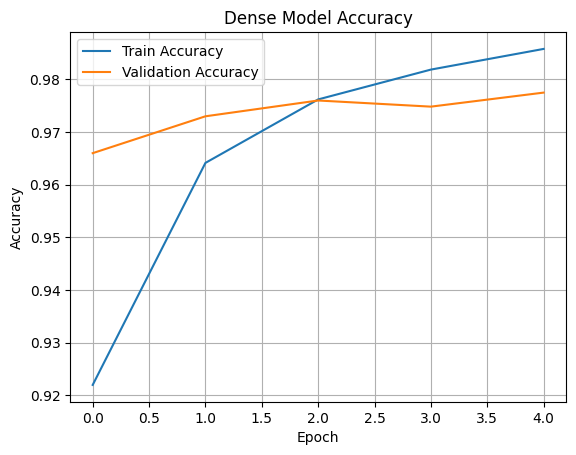

In [14]:
plt.plot(dense_history.history['accuracy'], label='Train Accuracy')
plt.plot(dense_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Dense Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


## 3️⃣ Convolutional Neural Network (CNN)

Architecture:
- `Conv2D(32)`: extract 32 feature maps using 3x3 filters
- `MaxPooling2D`: downsample using 2x2 pool
- `Dense(64)`: fully connected layer
- `Dense(10)`: output softmax layer

CNNs are better at capturing spatial patterns than dense networks.


In [15]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train_cnn, y_train_cat,
                            epochs=5, batch_size=32,
                            validation_split=0.1)


Epoch 1/5


/files/home/part1/skumar/Bookworm/Desktop/tensorflowneuralnetworks/tf/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8946 - loss: 0.3481 - val_accuracy: 0.9752 - val_loss: 0.0809
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9817 - loss: 0.0615 - val_accuracy: 0.9835 - val_loss: 0.0565
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9869 - loss: 0.0428 - val_accuracy: 0.9872 - val_loss: 0.0514
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9913 - loss: 0.0272 - val_accuracy: 0.9897 - val_loss: 0.0459
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9934 - loss: 0.0196 - val_accuracy: 0.9878 - val_loss: 0.0549


###  CNN Model: Accuracy per Epoch


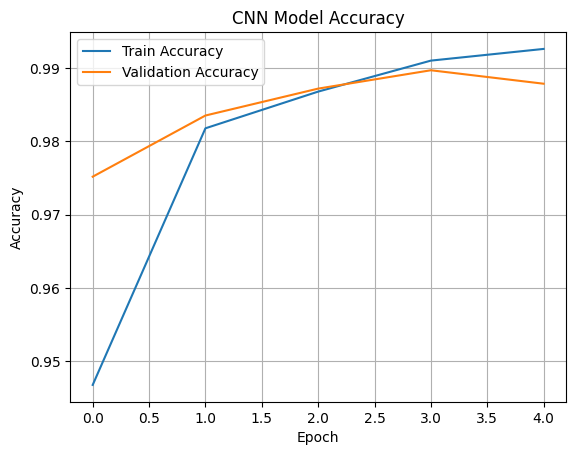

In [16]:
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


## 4️⃣ Model Evaluation on Test Data
Compare the accuracy of both models on the unseen test dataset.


In [17]:
dense_test_acc = dense_model.evaluate(x_test, y_test_cat, verbose=0)[1]
cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test_cat, verbose=0)[1]

print(f"Dense Model Accuracy: {dense_test_acc:.4f}")
print(f"CNN Model Accuracy:   {cnn_test_acc:.4f}")


Dense Model Accuracy: 0.9736
CNN Model Accuracy:   0.9848


## 5️⃣ Classification Report & Confusion Matrix (CNN)

Get detailed metrics:
- Precision, Recall, F1-score
- Confusion matrix showing actual vs. predicted digits


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report (CNN):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



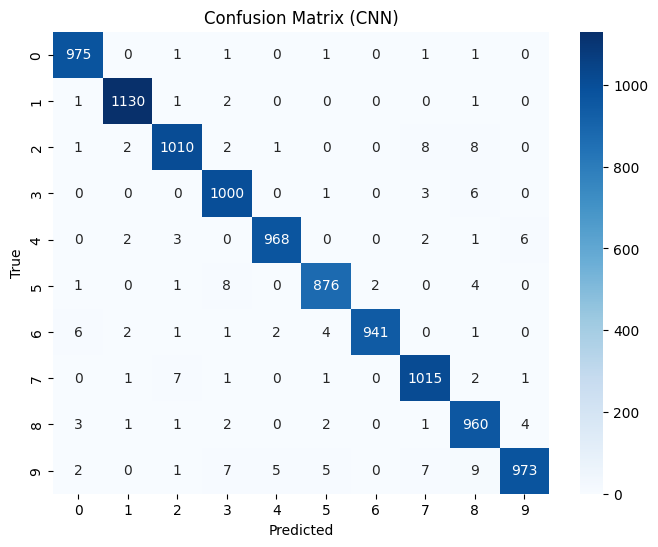

In [18]:
y_pred_cnn = np.argmax(cnn_model.predict(x_test_cnn), axis=1)

print("Classification Report (CNN):")
print(classification_report(y_test, y_pred_cnn))

conf_matrix = confusion_matrix(y_test, y_pred_cnn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix (CNN)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## 6️⃣ Visualize Misclassified Digits

Show some digits the CNN predicted incorrectly.
This helps understand edge cases.


Sample Misclassified Digits:


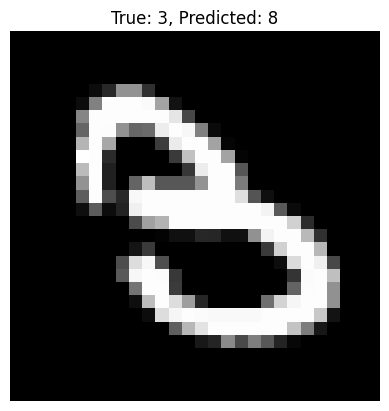

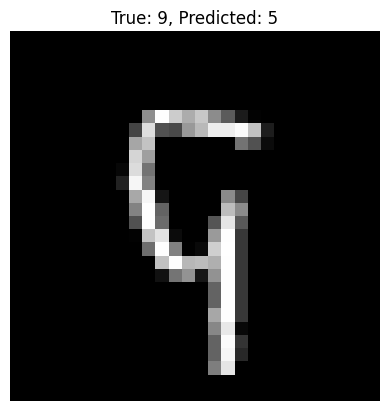

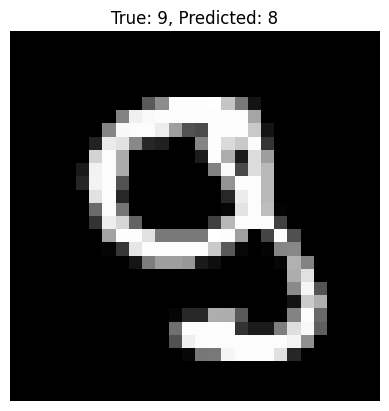

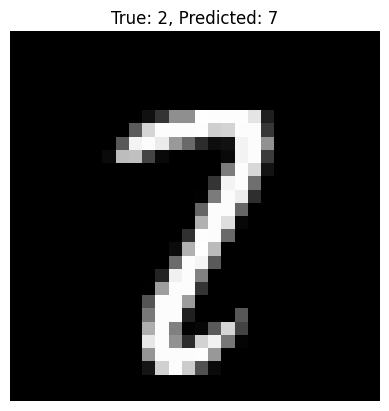

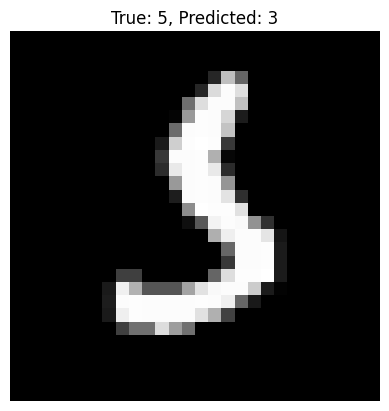

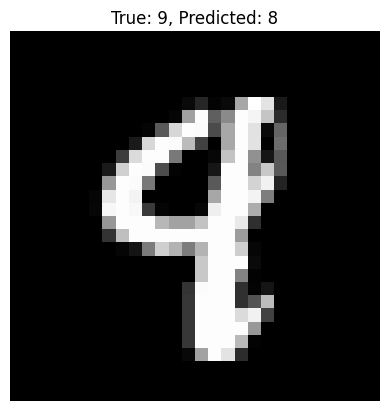

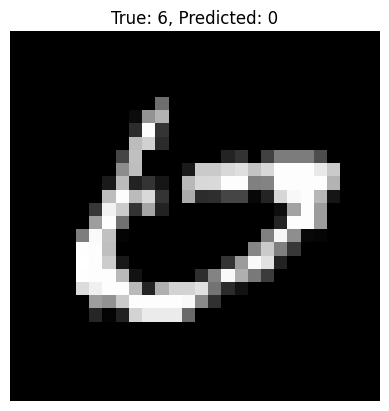

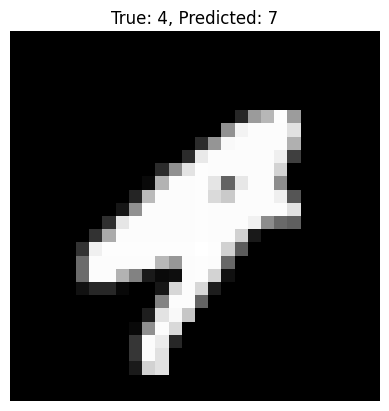

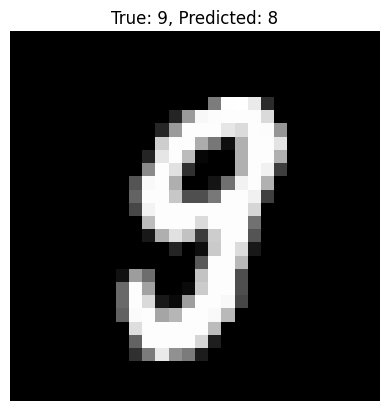

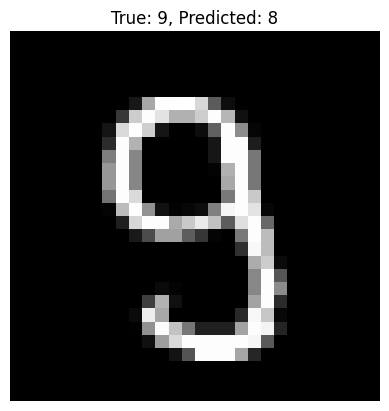

In [19]:
wrong = np.where(y_pred_cnn != y_test)[0]

print("Sample Misclassified Digits:")
for i in range(10):
    idx = wrong[i]
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {y_pred_cnn[idx]}")
    plt.axis('off')
    plt.show()


###  Correctly Classified Samples

To better understand what the model learns, here's a look at a few **correct predictions**. This complements the misclassified ones by showing digits the model recognizes confidently.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/files/home/part1/skumar/Bookworm/Desktop/tensorflowneuralnetworks/tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


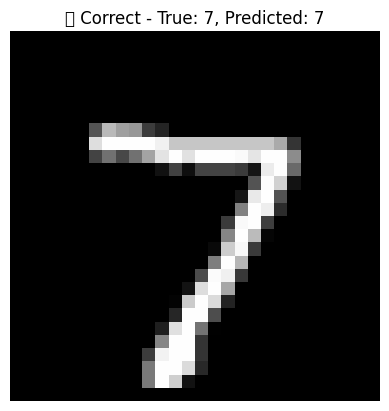

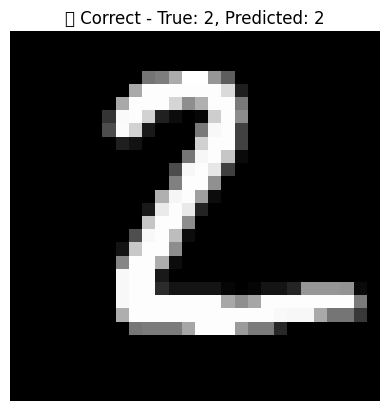

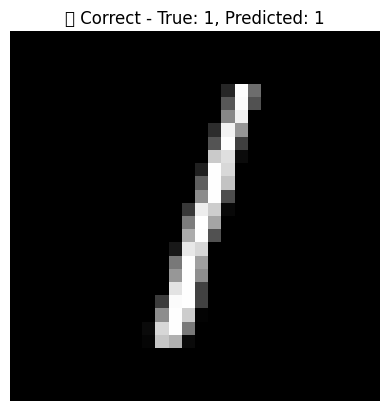

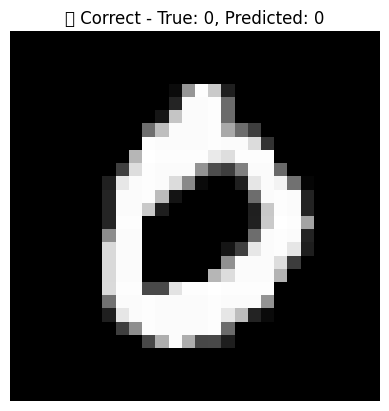

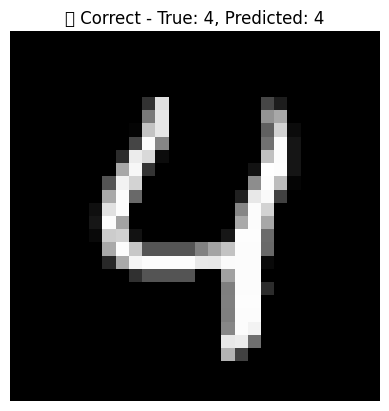

In [21]:
# Generate predictions from the CNN model
preds = cnn_model.predict(x_test_cnn)

# Indices of correct predictions
correct = np.where(np.argmax(preds, axis=1) == y_test)[0]

# Show 5 correctly predicted samples
for i in range(5):
    idx = correct[i]
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"✅ Correct - True: {y_test[idx]}, Predicted: {np.argmax(preds[idx])}")
    plt.axis('off')
    plt.show()



##  Summary & Observations

- The **CNN model** outperforms the **Dense model** due to its ability to learn spatial hierarchies.
- **Validation Accuracy** shows that both models generalize well, with CNN achieving higher test accuracy.
- Misclassification is often due to overlapping shapes (e.g., 4 vs 9).
- Adding more layers, dropout, or training for more epochs could further improve performance.
